In [163]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [164]:
# Carregando base de dados
EFPg = np.load("DataEFPsJetTagging/EFP d5-connected-not_normalized/g_efps_d5_primed.npy")
EFPq = np.load("DataEFPsJetTagging/EFP d5-connected-not_normalized/q_efps_d5_primed.npy")
EFPt = np.load("DataEFPsJetTagging/EFP d5-connected-not_normalized/t_efps_d5_primed.npy")

# Top tagging

In [165]:
# Separação de variáveis preditoras (features) e alvo (target)
X_g,y_g = EFPg, np.zeros((EFPg.shape[0], 1)).ravel()
X_q,y_q = EFPq, np.zeros((EFPq.shape[0], 1)).ravel()
X_t,y_t = EFPt, np.ones((EFPt.shape[0], 1)).ravel()

# Particionamento (amostragem estratificada)
X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(X_g, y_g, test_size=0.2, random_state=1)
X_q_train, X_q_test, y_q_train, y_q_test = train_test_split(X_q, y_q, test_size=0.2, random_state=1)
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = (
    np.concatenate((X_g_train, X_q_train, X_t_train), axis=0), np.concatenate((X_g_test, X_q_test, X_t_test), axis=0), np.concatenate((y_g_train, y_q_train, y_t_train), axis=0), np.concatenate((y_g_test, y_q_test, y_t_test), axis=0))

## LinearDiscriminantAnalysis

Intercept: -5.370116258569907


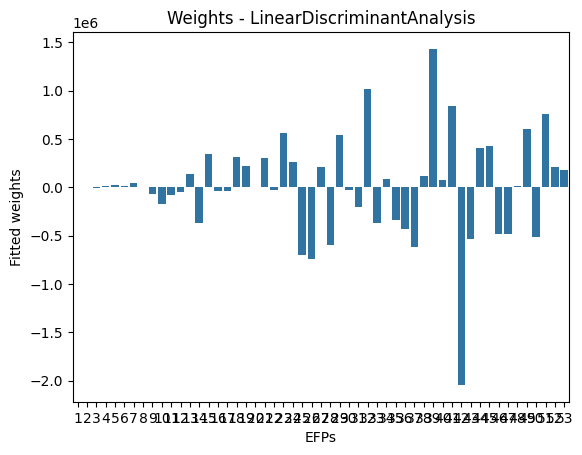

In [166]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_[0])

# Weights
coef = model.coef_[0]
fig = sns.barplot (x=np.arange(1, len(coef)+1), y=coef)
plt.xlabel("EFPs")
plt.ylabel("Fitted weights")
plt.title("Weights - LinearDiscriminantAnalysis");

In [167]:
y_pred = model.predict(X_test)

# Classification Report
print('Classification Report:\n',metrics.classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.92      0.91     69587
         1.0       0.84      0.82      0.83     35589

    accuracy                           0.89    105176
   macro avg       0.87      0.87      0.87    105176
weighted avg       0.88      0.89      0.88    105176

Confusion Matrix:
 [[64029  5558]
 [ 6537 29052]]


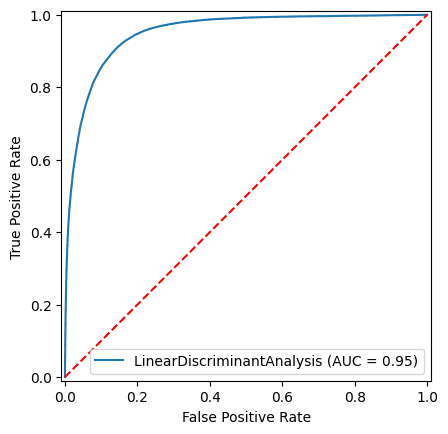

In [168]:
y_predprob = model.predict_proba(X_test)[:, -1]

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob)
roc_auc = metrics.roc_auc_score(y_test, y_predprob)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LinearDiscriminantAnalysis')
display.plot()
plt.plot([0,1],[0,1],'r--')
plt.show()

## QuadraticDiscriminantAnalysis

In [169]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

C:\Users\bruno\OneDrive\IA na física\projeto2 - classificação de jatos\pythonProject\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [170]:
y_pred = model.predict(X_test)

# Classification Report
print('Classification Report:\n',metrics.classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     69587
         1.0       0.85      0.67      0.75     35589

    accuracy                           0.85    105176
   macro avg       0.85      0.80      0.82    105176
weighted avg       0.85      0.85      0.84    105176

Confusion Matrix:
 [[65273  4314]
 [11692 23897]]


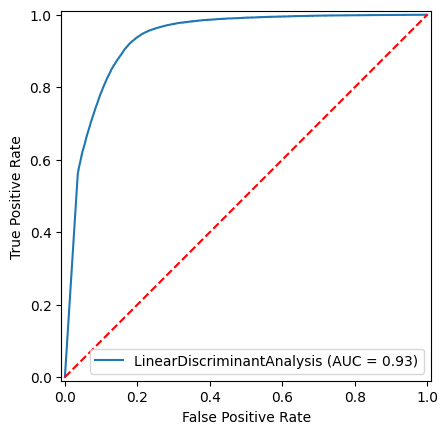

In [171]:
y_predprob = model.predict_proba(X_test)[:, -1]

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob)
roc_auc = metrics.roc_auc_score(y_test, y_predprob)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LinearDiscriminantAnalysis')
display.plot()
plt.plot([0,1],[0,1],'r--')
plt.show()

# Quark/Gluon discrimination

In [172]:
# Separação de variáveis preditoras (features) e alvo (target)
X_g,y_g = EFPg, np.zeros((EFPg.shape[0], 1)).ravel()
X_q,y_q = EFPq, np.ones((EFPq.shape[0], 1)).ravel()

# Particionamento (amostragem estratificada)
X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(X_g, y_g, test_size=0.2, random_state=1)
X_q_train, X_q_test, y_q_train, y_q_test = train_test_split(X_q, y_q, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = (
    np.concatenate((X_g_train, X_q_train), axis=0), np.concatenate((X_g_test, X_q_test), axis=0), np.concatenate((y_g_train, y_q_train), axis=0), np.concatenate((y_g_test, y_q_test), axis=0))

## LinearDiscriminantAnalysis

Intercept: 4.036241584698462


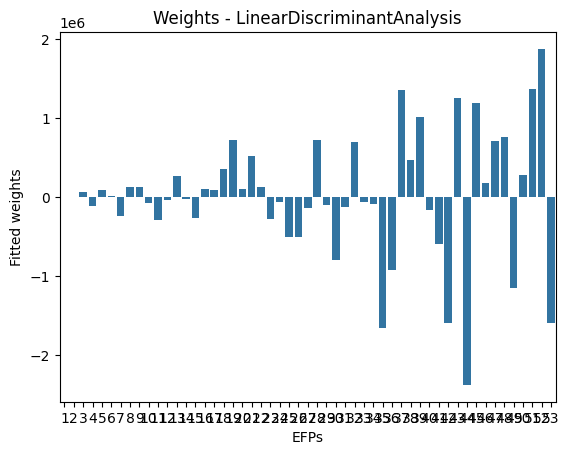

In [173]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

print('Intercept:', model.intercept_[0])

# Weights
coef = model.coef_[0]
fig = sns.barplot (x=np.arange(1, len(coef)+1), y=coef)
plt.xlabel("EFPs")
plt.ylabel("Fitted weights")
plt.title("Weights - LinearDiscriminantAnalysis");

In [174]:
y_pred = model.predict(X_test)

# Classification Report
print('Classification Report:\n',metrics.classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     35451
         1.0       0.71      0.72      0.71     34136

    accuracy                           0.72     69587
   macro avg       0.72      0.72      0.72     69587
weighted avg       0.72      0.72      0.72     69587

Confusion Matrix:
 [[25152 10299]
 [ 9433 24703]]


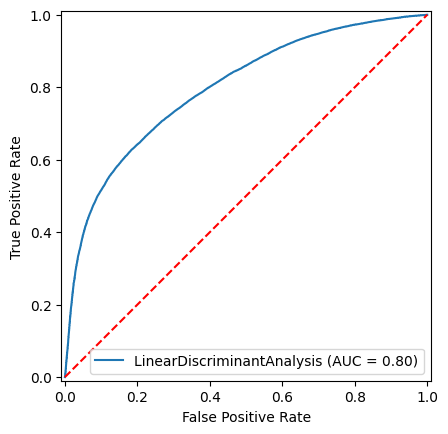

In [175]:
y_predprob = model.predict_proba(X_test)[:, -1]

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob)
roc_auc = metrics.roc_auc_score(y_test, y_predprob)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LinearDiscriminantAnalysis')
display.plot()
plt.plot([0,1],[0,1],'r--')
plt.show()

## QuadraticDiscriminantAnalysis

In [176]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

C:\Users\bruno\OneDrive\IA na física\projeto2 - classificação de jatos\pythonProject\.venv\Lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [177]:
y_pred = model.predict(X_test)

# Classification Report
print('Classification Report:\n',metrics.classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.25      0.38     35451
         1.0       0.55      0.94      0.69     34136

    accuracy                           0.59     69587
   macro avg       0.67      0.59      0.54     69587
weighted avg       0.68      0.59      0.53     69587

Confusion Matrix:
 [[ 8949 26502]
 [ 2192 31944]]


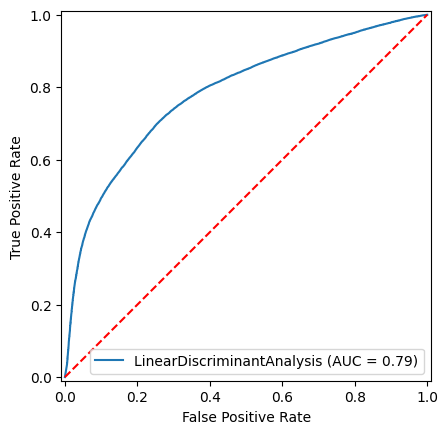

In [178]:
y_predprob = model.predict_proba(X_test)[:, -1]

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predprob)
roc_auc = metrics.roc_auc_score(y_test, y_predprob)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LinearDiscriminantAnalysis')
display.plot()
plt.plot([0,1],[0,1],'r--')
plt.show()